In [9]:
import pandas as pd
import numpy as np
from sklearn import tree
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from math import log
import matplotlib.pyplot as plt
%matplotlib inline
#import graphviz # conda install graphviz or pip install graphviz
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.grid_search import GridSearchCV
from time import time
from operator import itemgetter
from sklearn.cross_validation import  cross_val_score

In [10]:
#read data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [11]:
print(train.shape)

(1460, 81)


In [12]:
test.shape

(1459, 80)

In [13]:
#function do preprocessing
def miss_values(df):
    for column in df:
        # Test whether column has null value
        if len(df[column].apply(pd.isnull).value_counts()) > 1:
            #print(column+" has missing value")
            #if column is numeric, fill null with mean
            if df[column].dtype in ('int64','float64'):
                df[column] = df[column].fillna(df[column].mean())
            else:
                df[column] = df[column].fillna("unknown")
def factor_encoding(df):
    for column in df:
        if df[column].dtype == 'object':
            df = df.merge(pd.get_dummies(data=df[column],prefix=column),right_index=True,left_index=True)
            del df[column]
    return df

def plot_tree(clf, columns):
    dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=columns,
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = graphviz.Source(dot_data)  
    return graph 
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables))) #R^2 (coefficient of determination) regression score function.
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

In [17]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train['source'] = 1.0
test['source'] = 0.0



In [18]:
alls = pd.concat([train,test],ignore_index=True)
miss_values(alls)
alls = factor_encoding(alls)

In [19]:
train = alls[alls['source'] == 1.0]
train.drop(['source'],inplace=True,axis=1)
test = alls[alls['source'] == 0.0]
test.drop(['source'],inplace=True,axis=1)

/Users/jitxu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jitxu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [20]:
x = train.drop(['SalePrice'],axis=1)
Y = train['SalePrice']
x_test = test.drop(['SalePrice'],axis=1)
x_train, x_vali, Y_train, Y_vali = train_test_split(x, Y, test_size=0.25, random_state=42)

# DTree

In [21]:
clf = tree.DecisionTreeRegressor(max_depth = 4,min_samples_leaf=50)
clf.fit(x_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=50,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [22]:
y_pred = clf.predict(x_vali)

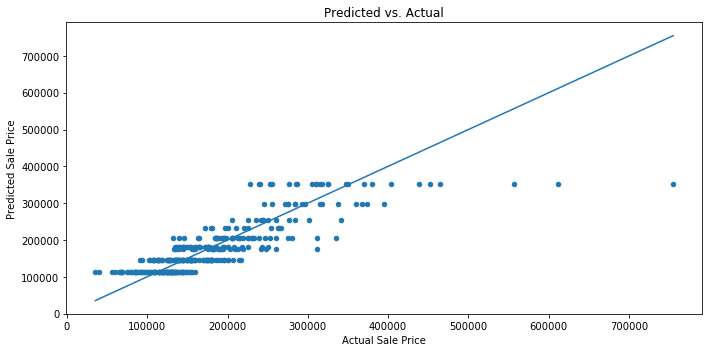

In [23]:
plt.figure(figsize=(10, 5))
plt.scatter(Y_vali, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(Y_vali), max(Y_vali)], [min(Y_vali), max(Y_vali)])
plt.tight_layout()

In [38]:
x_train.head(10)['OverallQual']

1023    7
810     6
1384    6
626     5
813     6
839     5
370     6
54      5
534     8
785     6
Name: OverallQual, dtype: int64

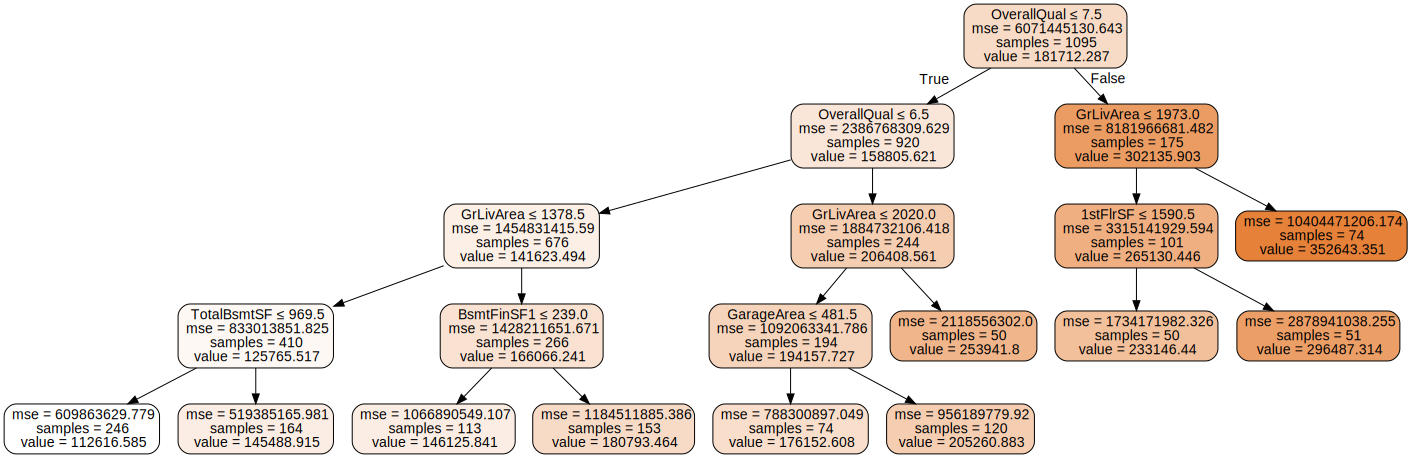

In [24]:
g = plot_tree(clf, list(x_train.columns))
g

In [25]:
get_score(Y_vali, y_pred)

R2: 0.7035312668559907
RMSE: 45572.525714835014


In [26]:
y_train_pred = clf.predict(x_train)
get_score(Y_train, y_train_pred)

R2: 0.726323513883943
RMSE: 40762.87243314422


# Pruning Tree 1

In [119]:
clf

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [27]:
clf = tree.DecisionTreeRegressor(criterion='mse', max_depth=50, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=20,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
clf.fit(x_train, Y_train)

#g = plot_tree(clf, list(x_train.columns))
#g


DecisionTreeRegressor(criterion='mse', max_depth=50, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=20,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [28]:
print("trainingg error: ")
y_train_pred = clf.predict(x_train)
get_score(Y_train, y_train_pred)
print("test error: ")
y_test_pred = clf.predict(x_vali)
get_score(Y_vali, y_test_pred)


trainingg error: 
R2: 0.8280378179708868
RMSE: 32311.90110060664
test error: 
R2: 0.8008876364194595
RMSE: 37347.60558621447


# Pruning Tree 2

In [39]:
clf = tree.DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
clf.fit(x_train, Y_train)

#g = plot_tree(clf, list(x_train.columns))
#g



DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [40]:
print("training metrics: ")
y_train_pred = clf.predict(x_train)
get_score(Y_train, y_train_pred)
print("test metrics: ")
y_test_pred = clf.predict(x_vali)
get_score(Y_vali, y_test_pred)

training metrics: 
R2: 0.8655439260320896
RMSE: 28571.711106929328
test metrics: 
R2: 0.7843592224103715
RMSE: 38866.82764649199


In [42]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [51]:
rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=20,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [52]:
rf.fit(x_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=20,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [53]:
print("training metrics: ")
y_train_pred = rf.predict(x_train)
get_score(Y_train, y_train_pred)
print("test metrics: ")
y_test_pred = rf.predict(x_vali)
get_score(Y_vali, y_test_pred)

training metrics: 
R2: 0.8630806492865452
RMSE: 28832.244539403986
test metrics: 
R2: 0.8359215386421495
RMSE: 33903.10207995808


# YOur version for parameter tuning

In [58]:
for depth in range(2,10):
    for leaf_no in range(1,50,10):
        for min_splits in range(2,100,20):
            print('\n when depth = {0}, and leaf_no = {1} , min_splits = {2}'.format(depth, leaf_no, min_splits))
            clf = tree.DecisionTreeRegressor(criterion='mse', max_depth=depth, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=leaf_no,
            min_samples_split=min_splits, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
            clf.fit(x_train, Y_train)
            print("training metrics: ")
            y_train_pred = clf.predict(x_train)
            get_score(Y_train, y_train_pred)
            print("test metrics: ")
            y_test_pred = clf.predict(x_vali)
            get_score(Y_vali, y_test_pred)


 when depth = 2, and leaf_no = 1 , min_splits = 2
training metrics: 
R2: 0.6217396608043659
RMSE: 47922.71793757798
test metrics: 
R2: 0.6613143997312394
RMSE: 48709.3143193345

 when depth = 2, and leaf_no = 1 , min_splits = 22
training metrics: 
R2: 0.6217396608043659
RMSE: 47922.71793757798
test metrics: 
R2: 0.6613143997312394
RMSE: 48709.3143193345

 when depth = 2, and leaf_no = 1 , min_splits = 42
training metrics: 
R2: 0.6217396608043659
RMSE: 47922.71793757798
test metrics: 
R2: 0.6613143997312394
RMSE: 48709.3143193345

 when depth = 2, and leaf_no = 1 , min_splits = 62
training metrics: 
R2: 0.6217396608043659
RMSE: 47922.71793757798
test metrics: 
R2: 0.6613143997312394
RMSE: 48709.3143193345

 when depth = 2, and leaf_no = 1 , min_splits = 82
training metrics: 
R2: 0.6217396608043659
RMSE: 47922.71793757798
test metrics: 
R2: 0.6613143997312394
RMSE: 48709.3143193345

 when depth = 2, and leaf_no = 11 , min_splits = 2
training metrics: 
R2: 0.6217396608043659
RMSE: 47922.

training metrics: 
R2: 0.8055927802352788
RMSE: 34355.97135582601
test metrics: 
R2: 0.7833809416159153
RMSE: 38954.889944745686

 when depth = 4, and leaf_no = 1 , min_splits = 62
training metrics: 
R2: 0.7478592901038797
RMSE: 39126.186695557735
test metrics: 
R2: 0.7346413198074121
RMSE: 43115.18948665251

 when depth = 4, and leaf_no = 1 , min_splits = 82
training metrics: 
R2: 0.7478592901038797
RMSE: 39126.186695557735
test metrics: 
R2: 0.7346413198074121
RMSE: 43115.18948665251

 when depth = 4, and leaf_no = 11 , min_splits = 2
training metrics: 
R2: 0.7806380318914268
RMSE: 36494.44003024346
test metrics: 
R2: 0.7643440480281403
RMSE: 40630.564524580615

 when depth = 4, and leaf_no = 11 , min_splits = 22
training metrics: 
R2: 0.7806380318914268
RMSE: 36494.44003024346
test metrics: 
R2: 0.7643440480281403
RMSE: 40630.564524580615

 when depth = 4, and leaf_no = 11 , min_splits = 42
training metrics: 
R2: 0.7776001485030485
RMSE: 36746.27185752137
test metrics: 
R2: 0.762465

training metrics: 
R2: 0.765100664758908
RMSE: 37764.77757303462
test metrics: 
R2: 0.7585412248413027
RMSE: 41127.76851940775

 when depth = 6, and leaf_no = 1 , min_splits = 2
training metrics: 
R2: 0.9131571617363949
RMSE: 22962.176018547816
test metrics: 
R2: 0.8057850478635228
RMSE: 36885.44106149894

 when depth = 6, and leaf_no = 1 , min_splits = 22
training metrics: 
R2: 0.8897258717263559
RMSE: 25875.14867866281
test metrics: 
R2: 0.8164799738620432
RMSE: 35855.466813162224

 when depth = 6, and leaf_no = 1 , min_splits = 42
training metrics: 
R2: 0.851066220111214
RMSE: 30070.638049333254
test metrics: 
R2: 0.820073560822339
RMSE: 35502.68036538156

 when depth = 6, and leaf_no = 1 , min_splits = 62
training metrics: 
R2: 0.7813490696818126
RMSE: 36435.24565844034
test metrics: 
R2: 0.7576684083858675
RMSE: 41202.03505170926

 when depth = 6, and leaf_no = 1 , min_splits = 82
training metrics: 
R2: 0.779883279177814
RMSE: 36557.168829231574
test metrics: 
R2: 0.75711374609994

R2: 0.9689388383032856
RMSE: 13732.666854461571
test metrics: 
R2: 0.7821257229069231
RMSE: 39067.59073185878

 when depth = 8, and leaf_no = 1 , min_splits = 22
training metrics: 
R2: 0.9165219410986902
RMSE: 22512.93970657491
test metrics: 
R2: 0.8220849114265756
RMSE: 35303.68508429626

 when depth = 8, and leaf_no = 1 , min_splits = 42
training metrics: 
R2: 0.8664570611662791
RMSE: 28474.525908498203
test metrics: 
R2: 0.823210305285654
RMSE: 35191.852022062056

 when depth = 8, and leaf_no = 1 , min_splits = 62
training metrics: 
R2: 0.7881319965559328
RMSE: 35865.65150460132
test metrics: 
R2: 0.7601614303056936
RMSE: 40989.55114879449

 when depth = 8, and leaf_no = 1 , min_splits = 82
training metrics: 
R2: 0.7831345519255353
RMSE: 36286.17737812012
test metrics: 
R2: 0.7578798788128126
RMSE: 41184.05367015366

 when depth = 8, and leaf_no = 11 , min_splits = 2
training metrics: 
R2: 0.8573907142238505
RMSE: 29425.234981390757
test metrics: 
R2: 0.8048363648821493
RMSE: 36975.

R2: 0.7721728978018693
RMSE: 37191.93125221275
test metrics: 
R2: 0.7614459038595771
RMSE: 40879.64247844064

 when depth = 9, and leaf_no = 41 , min_splits = 42
training metrics: 
R2: 0.7721728978018693
RMSE: 37191.93125221275
test metrics: 
R2: 0.7614459038595771
RMSE: 40879.64247844064

 when depth = 9, and leaf_no = 41 , min_splits = 62
training metrics: 
R2: 0.7721728978018693
RMSE: 37191.93125221275
test metrics: 
R2: 0.7614459038595771
RMSE: 40879.64247844064

 when depth = 9, and leaf_no = 41 , min_splits = 82
training metrics: 
R2: 0.7721728978018693
RMSE: 37191.93125221275
test metrics: 
R2: 0.7614459038595771
RMSE: 40879.64247844064


# Grid Search and CV

In [55]:
def run_gridsearch(X, y, clf, param_grid,  cv=5):
    """Run a grid search for best Decision Tree parameters.

    Args
    ----
    X -- features
    y -- targets (classes)
    cf -- scikit-learn Decision Tree
    param_grid -- [dict] parameter settings to test
    cv -- fold of cross-validation, default 5

    Returns
    -------
    top_params -- [dict] from report()
    """
    grid_search = GridSearchCV(clf,
                               param_grid=param_grid,
                               cv=cv)
    start = time()
    grid_search.fit(X, y)

    print(("\nGridSearchCV took {:.2f} "
           "seconds for {:d} candidate "
           "parameter settings.").format(time() - start,
                len(grid_search.grid_scores_)))

    top_params = report(grid_search.grid_scores_, 30)
    return  top_params


def report(grid_scores, n_top=30):
    """Report top n_top parameters settings, default n_top=3.

    Args
    ----
    grid_scores -- output from grid or random search
    n_top -- how many to report, of top models

    Returns
    -------
    top_params -- [dict] top parameter settings found in
                  search
    """
    top_scores = sorted(grid_scores,
                        key=itemgetter(1),
                        reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print(("Mean validation score: "
               "{0:.3f} (std: {1:.3f})").format(
               score.mean_validation_score,
               np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

    return top_scores[0].parameters

In [56]:
print("-- Grid Parameter Search via 10-fold CV")

# set of parameters to test
param_grid = {"criterion": [ "mse","friedman_mse"],
              "min_samples_split": [10, 20,30],
              "max_depth": [2,4, 6,7,8,9],
              "min_samples_leaf": [5, 6,7,8,9,10,15,20],
              }

dt = tree.DecisionTreeRegressor()

ts_gs = run_gridsearch(x, Y, dt, param_grid, cv=10)

-- Grid Parameter Search via 10-fold CV

GridSearchCV took 49.88 seconds for 288 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.785 (std: 0.051)
Parameters: {'criterion': 'mse', 'max_depth': 9, 'min_samples_leaf': 20, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.785 (std: 0.051)
Parameters: {'criterion': 'mse', 'max_depth': 9, 'min_samples_leaf': 20, 'min_samples_split': 30}

Model with rank: 3
Mean validation score: 0.785 (std: 0.051)
Parameters: {'criterion': 'friedman_mse', 'max_depth': 9, 'min_samples_leaf': 20, 'min_samples_split': 10}

Model with rank: 4
Mean validation score: 0.785 (std: 0.051)
Parameters: {'criterion': 'friedman_mse', 'max_depth': 9, 'min_samples_leaf': 20, 'min_samples_split': 30}

Model with rank: 5
Mean validation score: 0.785 (std: 0.051)
Parameters: {'criterion': 'mse', 'max_depth': 9, 'min_samples_leaf': 20, 'min_samples_split': 20}

Model with rank: 6
Mean validation score: 0.785 (std: 0.051)
Parameters

In [57]:
print("\n-- Best Parameters:")
for k, v in ts_gs.items():
    print("parameter: {:<20s} setting: {}".format(k, v))


-- Best Parameters:
parameter: criterion            setting: mse
parameter: max_depth            setting: 9
parameter: min_samples_leaf     setting: 20
parameter: min_samples_split    setting: 10


In [58]:
# test the retuned best parameters
print("\n\n-- Testing best parameters [Grid]...")
dt_ts_gs = tree.DecisionTreeRegressor(**ts_gs)
scores = cross_val_score(dt_ts_gs, x, Y, cv=10)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )



-- Testing best parameters [Grid]...
mean: 0.785 (std: 0.051)



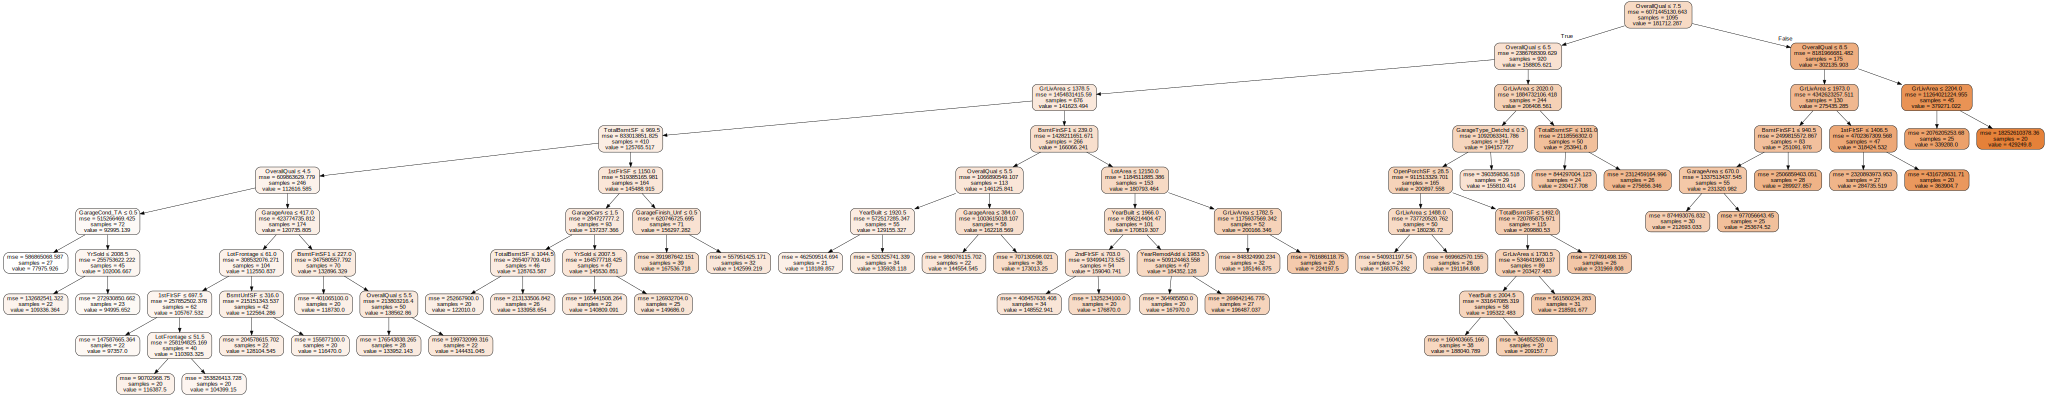

In [59]:
dt_ts_gs.fit(x_train,Y_train)
#g = plot_tree(dt_ts_gs, list(x_train.columns))
#g

In [60]:
print("training metrics: ")
y_train_pred = dt_ts_gs.predict(x_train)
get_score(Y_train, y_train_pred)
print("test metrics: ")
y_test_pred = dt_ts_gs.predict(x_vali)
get_score(Y_vali, y_test_pred)

training metrics: 
R2: 0.8280378179708868
RMSE: 32311.90110060664
test metrics: 
R2: 0.8008876364194595
RMSE: 37347.60558621447


# Final Submission

In [61]:
y_pred = dt_ts_gs.predict(x_test)
test['SalePrice'] = y_pred
result = test[['Id','SalePrice']]
result.to_csv('submission_dt_ts_gs.csv',index=False)

/Users/jitxu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
